***Import necessary packages***

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')




***Read the dataset***

In [ ]:
df=pd.read_csv("/content/airline.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


***Replace space in column with underscore***

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


***Drop unnecessary columns***

In [ ]:
df.drop(['Unnamed:_0','id'],axis=1,inplace=True)
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


***Check is there any null values in a given data set***




In [ ]:
df.isnull().sum()

,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0
Gate_location,0


***Handling the missing data***

In [ ]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


***Exploratory Data Analysis***

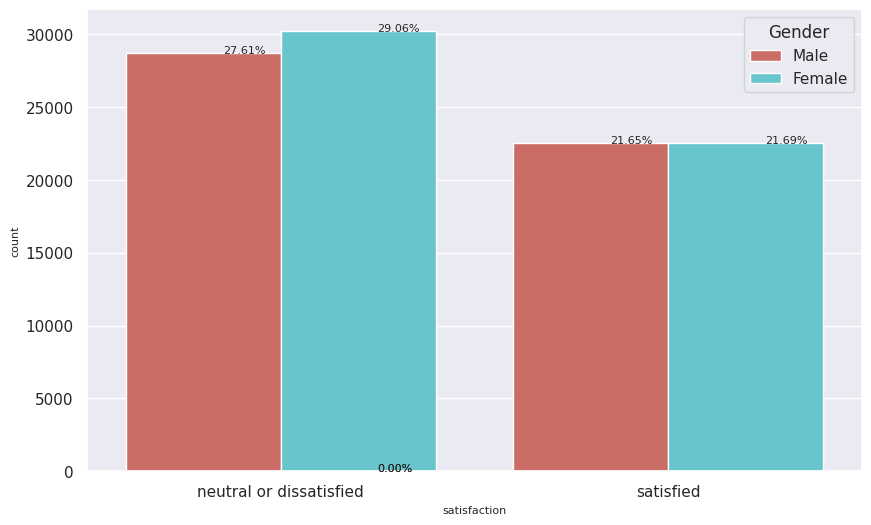

In [ ]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=df,x='satisfaction',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

*Inference:Gender doesn't affect the passenger satisfaction*

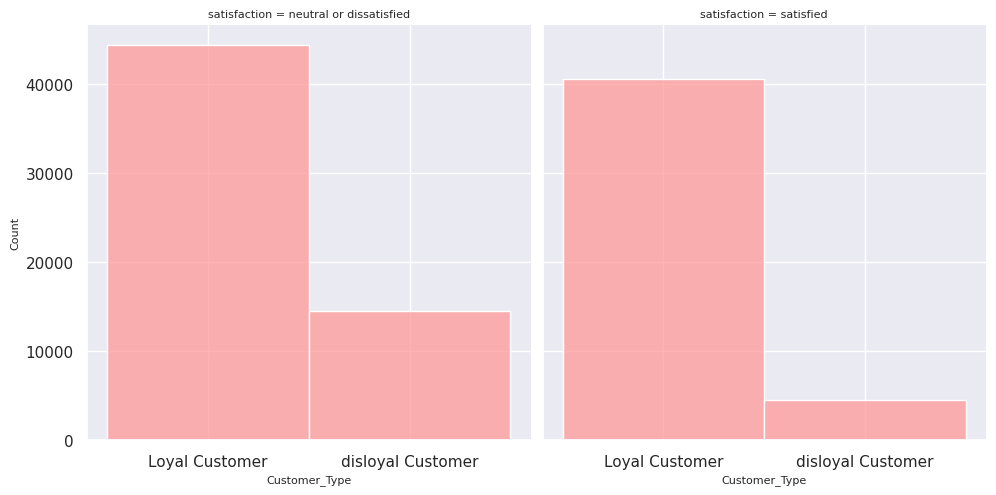

In [ ]:
sns.displot(data=df,x='Customer_Type',col='satisfaction',color='#ff9999')
plt.show()

Inference:Among loyal customers, the numbers of satisfied and neutral or dissatisfied customers are quite close.

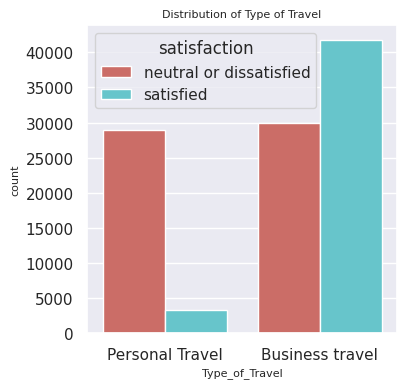

In [ ]:
sns.countplot(x='Type_of_Travel',data=df,hue='satisfaction',palette='hls')
plt.title('Distribution of Type of Travel')
plt.show()

Inference:Business travelers tend to be more satisfied compared to personal travelers.

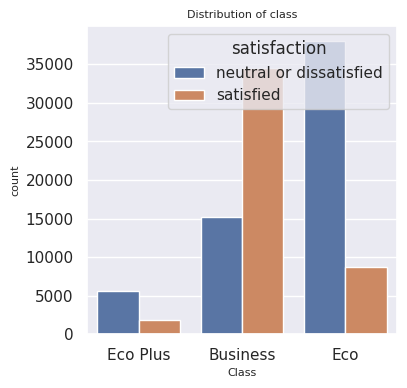

In [ ]:
sns.countplot(x='Class',data=df,hue='satisfaction')
plt.title('Distribution of class')
plt.show()

Inference:The business class shows the highest satisfaction rate whereas eco has a significant number of neutral or dissatisfied passengers.

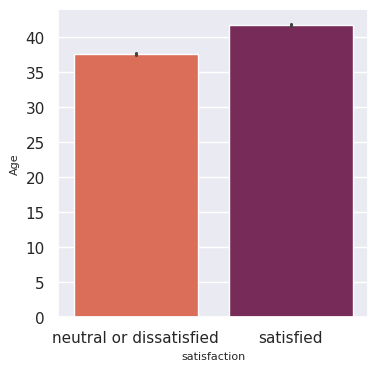

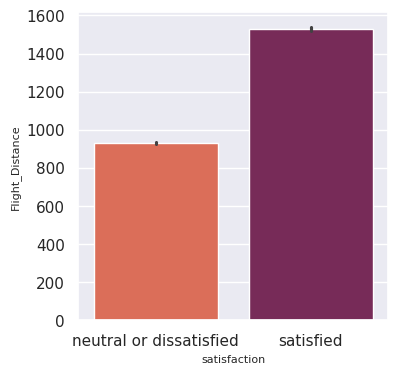

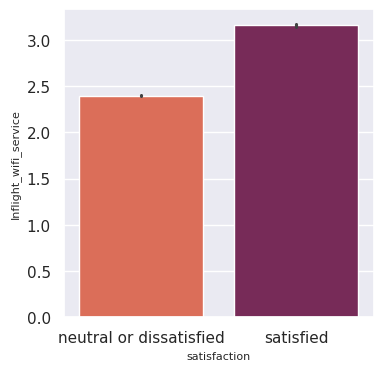

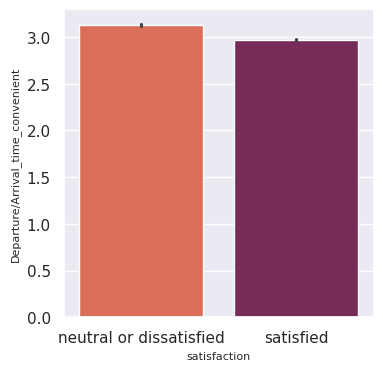

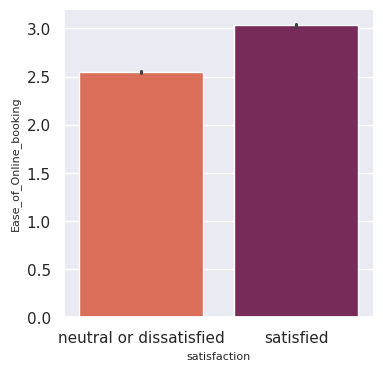

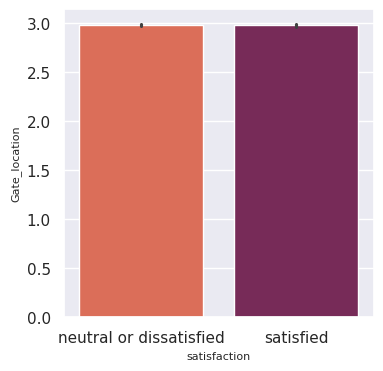

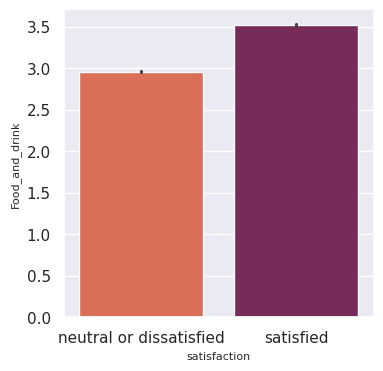

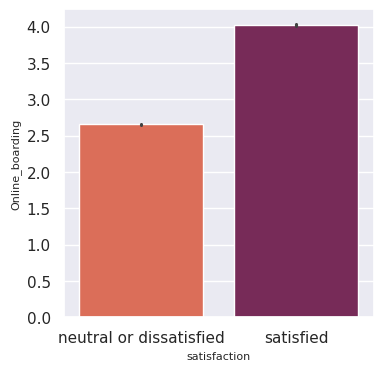

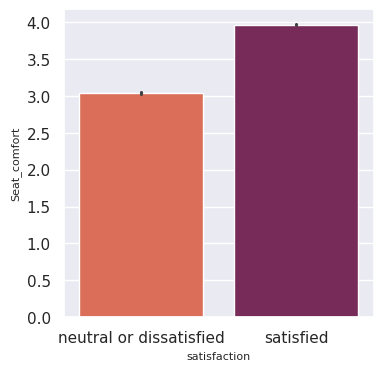

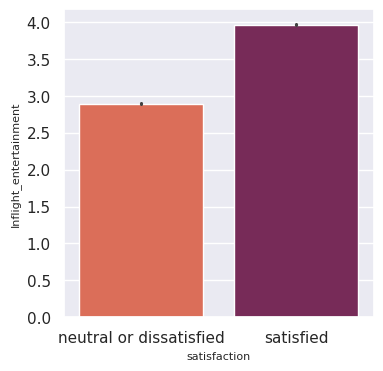

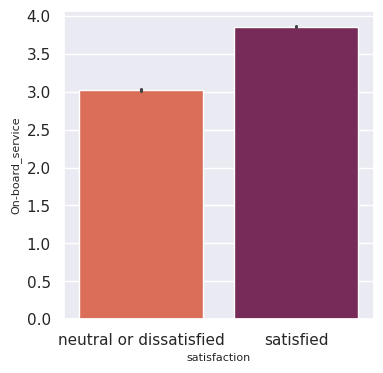

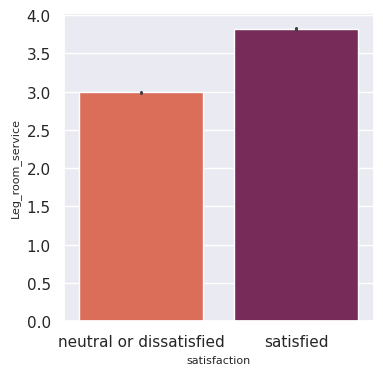

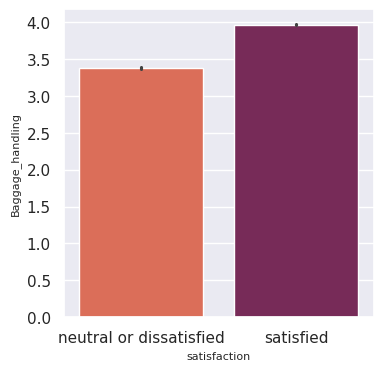

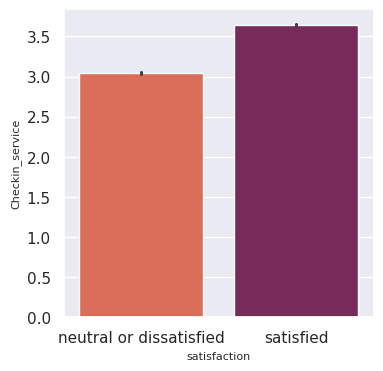

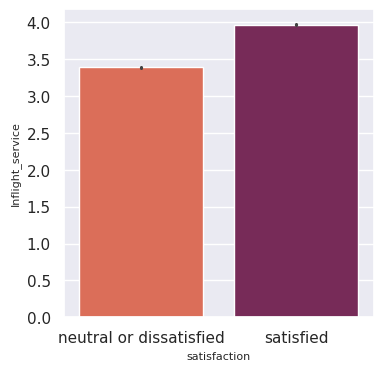

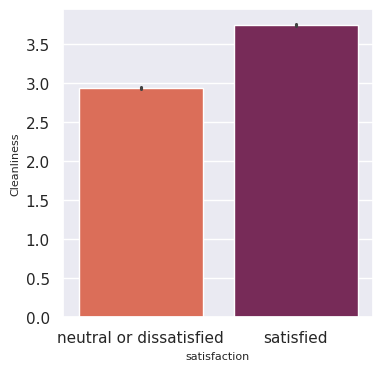

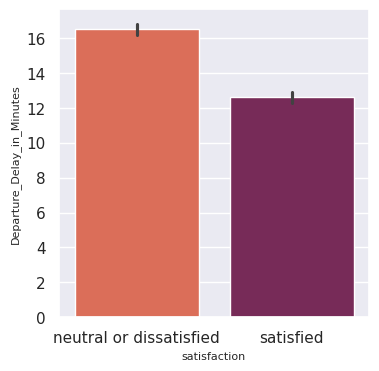

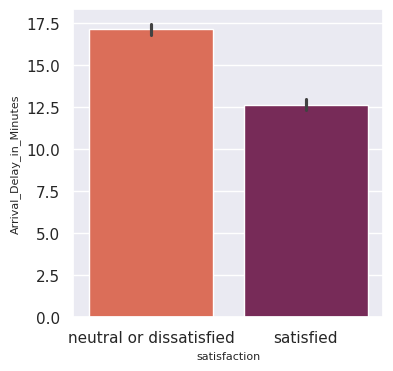

In [ ]:
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
numerical_values=['Age','Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
for i in numerical_values:
    sns.barplot(data=df, x='satisfaction', y=i, palette='rocket_r')
    plt.show()


*Inference:Gate location doesn't affect the passenger satisfaction*

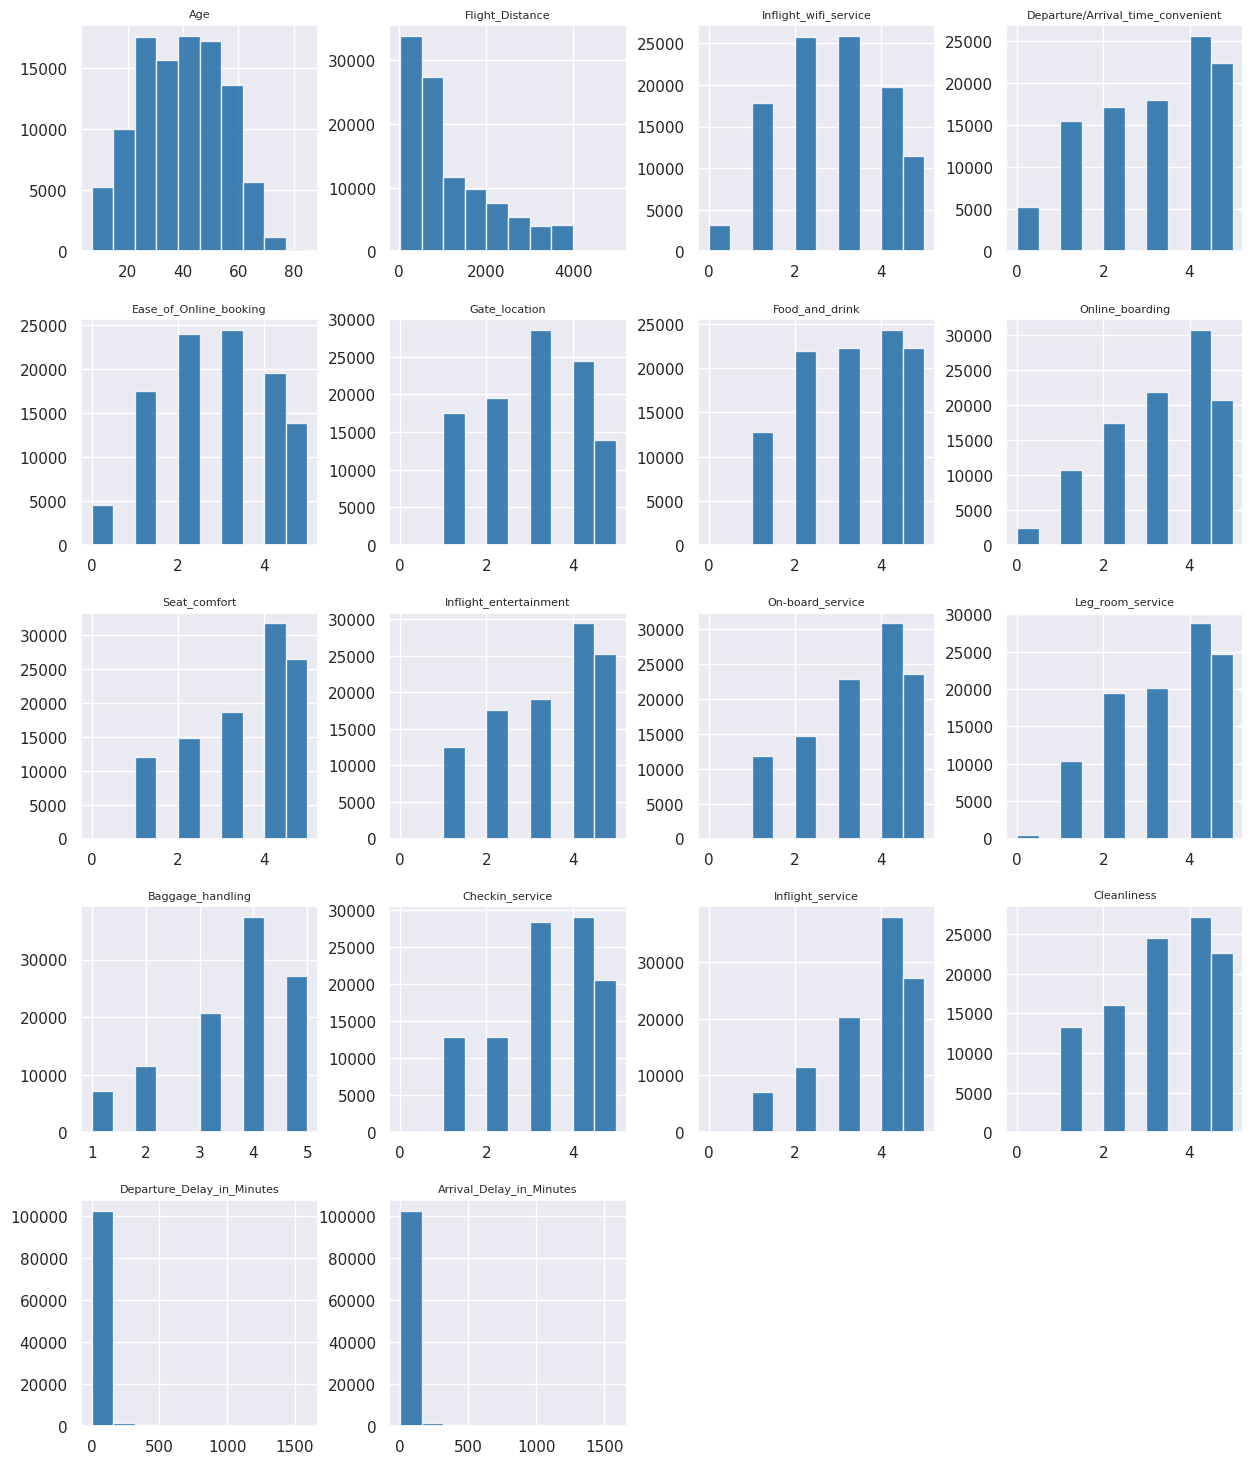

In [ ]:
hist = df.hist(figsize = (15, 22), layout=(6, 4) , color='#1363a1',alpha=0.8 )

*Inference:The plot above provides insights into each feature.*



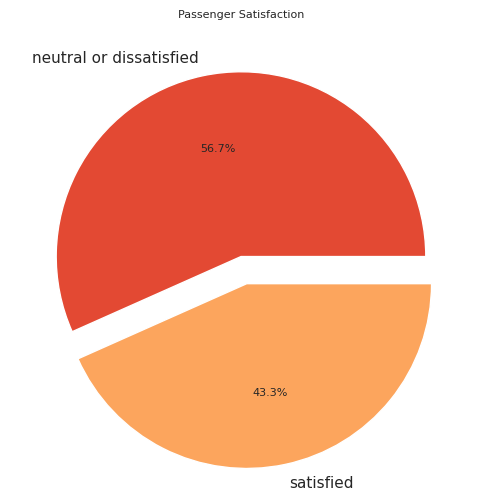

In [ ]:
category_counts = df['satisfaction'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index,colors=sns.color_palette("RdYlBu"), autopct='%1.1f%%',explode = [0, 0.15])
plt.title('Passenger Satisfaction')
plt.show()

*Inference:The major class in the dataset is "neutral or dissatisfied" ,while the minor class is "satisfied". Since the dataset is balanced, there is no need for resampling.*

***Check the datatypes of each column***


In [ ]:
df.dtypes

,0
Gender,object
Customer_Type,object
Age,int64
Type_of_Travel,object
Class,object
Flight_Distance,int64
Inflight_wifi_service,int64
Departure/Arrival_time_convenient,int64
Ease_of_Online_booking,int64
Gate_location,int64


***Label Encoding of categorical variables***



In [ ]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
encoder1=LabelEncoder()
df['Customer_Type']=encoder1.fit_transform(df['Customer_Type'])
encoder2=LabelEncoder()
df['Type_of_Travel']=encoder2.fit_transform(df['Type_of_Travel'])
encoder3=LabelEncoder()
df['Class']=encoder3.fit_transform(df['Class'])
encoder4=LabelEncoder()
df['satisfaction']=encoder4.fit_transform(df['satisfaction'])
encoder5=LabelEncoder()
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


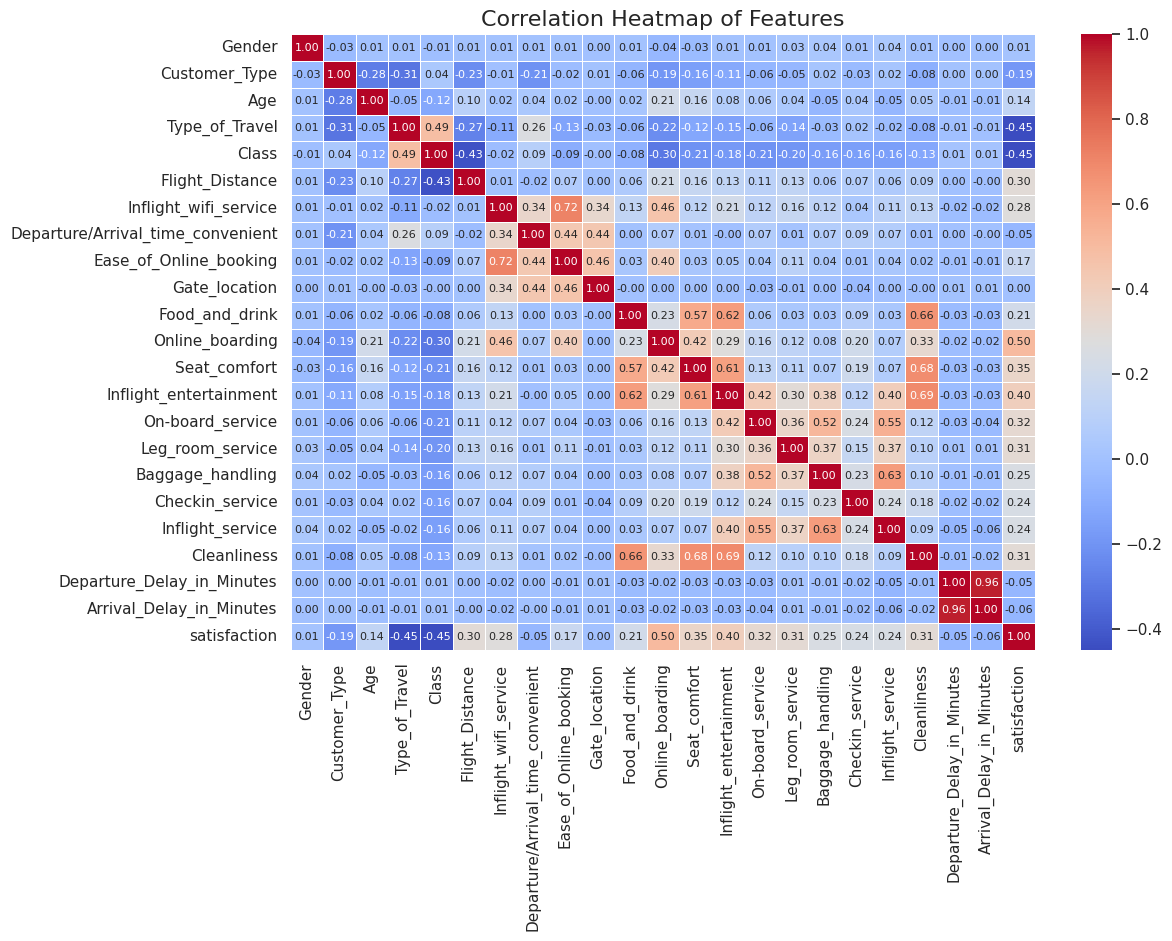

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap of Features',fontsize=16)
plt.show()

Inference:Among features, online boarding has highest correlation with the output and gate location has the lowest correlation.

***Detection Of Outliers Using IQR Method***







In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

***Removal Of Outliers***

In [ ]:
def remove_outliers(df, IQR):
    for col in df.columns:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df= remove_outliers(df, IQR)
df=df.reset_index(drop=True)

In [ ]:
df.shape

(61197, 23)

***Split the data into features and target***

In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
2,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
3,0,0,26,1,1,1180,3,4,2,1,...,1,1,3,4,4,4,4,1,0,0.0
4,1,0,47,1,1,1276,2,4,2,3,...,2,2,3,3,4,3,5,2,9,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61192,1,0,26,0,0,712,4,4,4,4,...,5,5,3,4,4,3,4,5,17,26.0
61193,0,0,60,0,0,1599,5,5,5,5,...,4,4,4,4,4,4,4,4,9,7.0
61194,1,0,50,1,1,1620,3,1,3,4,...,2,2,4,3,4,2,4,2,0,0.0
61195,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0


In [ ]:
y=df.iloc[:,-1]
y

,satisfaction
0,0
1,1
2,1
3,0
4,0
...,...
61192,1
61193,1
61194,0
61195,1


***Scale the features***

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[1.        , 0.        , 0.07692308, ..., 1.        , 0.83333333,
        0.5625    ],
       [0.        , 0.        , 0.24358974, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.69230769, ..., 0.6       , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.55128205, ..., 0.4       , 0.        ,
        0.        ],
       [1.        , 0.        , 0.53846154, ..., 0.8       , 0.        ,
        0.        ],
       [1.        , 0.        , 0.25641026, ..., 0.2       , 0.        ,
        0.        ]])

***Split X and Y for training and testing***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

***Building models***

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)
models=[knn,sv,nb,dt,rf,ab,gb,xg]
for model in models:
  print('*****************************',model,'**********************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits=4))

***************************** KNeighborsClassifier() **********************************
              precision    recall  f1-score   support

           0     0.9029    0.9639    0.9324      8937
           1     0.9634    0.9017    0.9315      9423

    accuracy                         0.9320     18360
   macro avg     0.9332    0.9328    0.9320     18360
weighted avg     0.9340    0.9320    0.9320     18360

***************************** SVC() **********************************
              precision    recall  f1-score   support

           0     0.9380    0.9681    0.9528      8937
           1     0.9688    0.9393    0.9538      9423

    accuracy                         0.9533     18360
   macro avg     0.9534    0.9537    0.9533     18360
weighted avg     0.9538    0.9533    0.9533     18360

***************************** GaussianNB() **********************************
              precision    recall  f1-score   support

           0     0.8576    0.9173    0.8865      8937


***Feature Selection***

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
selector = SelectFromModel(rf(random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']


*Inference: Most important features are ; Type_of_Travel, Inflight_wifi_service, Online_boarding, Class,Inflight_entertinment and Seat_comfort.*




In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=15)
X_n = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print('Selected Features:', selected_features.tolist())

Selected Features: ['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']


In [ ]:
X_new=df[['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']]
X_new

,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,1,2,460,3,4,5,3,5,5,4,3,4,4,5,5
1,0,0,1142,2,2,5,5,5,5,4,3,4,4,4,5
2,0,0,214,3,3,4,5,5,3,3,4,4,3,3,3
3,1,1,1180,3,4,1,2,1,1,3,4,4,4,4,1
4,1,1,1276,2,4,2,2,2,2,3,3,4,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61192,0,0,712,4,4,5,5,5,5,3,4,4,3,4,5
61193,0,0,1599,5,5,5,5,4,4,4,4,4,4,4,4
61194,1,1,1620,3,1,2,3,2,2,4,3,4,2,4,2
61195,0,0,2347,4,4,2,4,5,5,5,5,5,5,5,4


In [ ]:
scaler=MinMaxScaler()
X_new_scaled=scaler.fit_transform(X_new)
X_new_scaled

array([[1.        , 1.        , 0.11578947, ..., 0.66666667, 1.        ,
        1.        ],
       [0.        , 0.        , 0.29986505, ..., 0.66666667, 0.8       ,
        1.        ],
       [0.        , 0.        , 0.04939271, ..., 0.33333333, 0.6       ,
        0.6       ],
       ...,
       [1.        , 0.5       , 0.42887989, ..., 0.        , 0.8       ,
        0.4       ],
       [0.        , 0.        , 0.62510121, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.        , 0.45668016, ..., 0.66666667, 0.6       ,
        0.2       ]])

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new_scaled,y,test_size=0.3,random_state=1)

In [ ]:
acc=[]
knn1=KNeighborsClassifier(n_neighbors=5)
sv1=SVC()
nb1=GaussianNB()
dt1=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf1=RandomForestClassifier(random_state=1)
ab1=AdaBoostClassifier(random_state=1)
gb1=GradientBoostingClassifier(random_state=1)
xg1=XGBClassifier(random_state=1)
models=[knn1,sv1,nb1,dt1,rf1,ab1,gb1,xg1]
for model in models:
  print('*****************************',model,'**********************************')
  model.fit(X_new_train,y_new_train)
  y_pred1=model.predict(X_new_test)
  print(classification_report(y_new_test,y_pred1,digits=4))
  acc.append(accuracy_score(y_new_test,y_pred1))

***************************** KNeighborsClassifier() **********************************
              precision    recall  f1-score   support

           0     0.9010    0.9725    0.9354      8937
           1     0.9718    0.8987    0.9338      9423

    accuracy                         0.9346     18360
   macro avg     0.9364    0.9356    0.9346     18360
weighted avg     0.9373    0.9346    0.9346     18360

***************************** SVC() **********************************
              precision    recall  f1-score   support

           0     0.9413    0.9724    0.9566      8937
           1     0.9729    0.9425    0.9575      9423

    accuracy                         0.9570     18360
   macro avg     0.9571    0.9574    0.9570     18360
weighted avg     0.9575    0.9570    0.9570     18360

***************************** GaussianNB() **********************************
              precision    recall  f1-score   support

           0     0.8526    0.9202    0.8851      8937


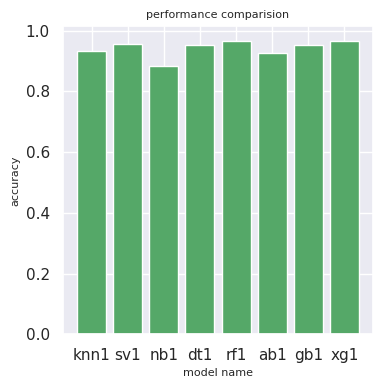

In [ ]:
model_names=['knn1','sv1','nb1','dt1','rf1','ab1','gb1','xg1']
plt.bar(model_names,acc,color='g')
plt.xlabel('model name')
plt.ylabel('accuracy')
plt.title('performance comparision')
plt.show()

***Inference:Random forest shows best performance after feature selection.***

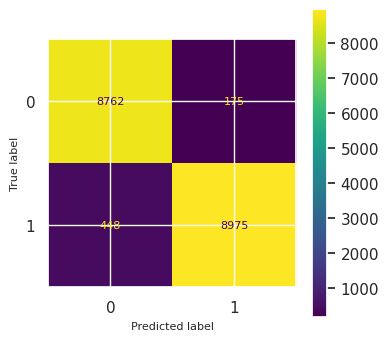

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_new_test,y_pred1))



***Saving the model for creating GUI***



In [ ]:
import pickle
pickle.dump(rf1,open("passenger_satisfaction.sav",'wb'))
pickle.dump(scaler,open("scaler.sav",'wb'))